In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


warzone = pd.read_csv('Warzone.csv', header=2)

coord_dict = {"A": "0", "B": "1", "C": "2", "D": "3", "E": "4", 
              "F": "5", "G": "6", "H": "7", "I": "8", "J": "9", "K": "10"}

warzone["date"] = pd.to_datetime(warzone["date"])

In [2]:
from numpy.linalg import norm
import math


drop_plane_dist = []
drop_center_dist = []

for index, row in warzone.iterrows():
    drop = np.array([row['drop_location_lat'], row['drop_location_lon']])
    center = np.array([row['circle_middle_lat'], row['circle_middle_lon']])
    pl_st = np.array([row['plane_start_lat'], row['plane_start_lon']])
    pl_end = np.array([row['plane_end_lat'], row['plane_end_lon']])
    
    drop_plane_dist.append(np.abs(np.cross(pl_end-pl_st, pl_st-drop))/norm(pl_end-pl_st))
    drop_center_dist.append(math.hypot(drop[0] - center[0], drop[1] - center[1]))
    
warzone['drop_plane_dist'] = pd.Series(drop_plane_dist)
warzone['drop_center_dist'] = pd.Series(drop_center_dist)

Important Statistics:
Overall Average Finish: 9.79

Duos Average: 6.00
Trios Average: 12.17
Quads Average: 8.29


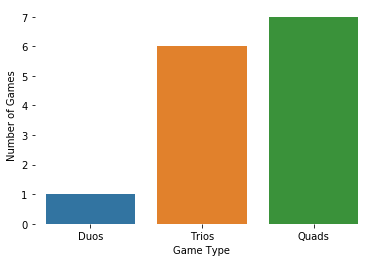

In [3]:
by_game_type = warzone.groupby("team_num").mean()["place"]

print("Important Statistics:\nOverall Average Finish: {:.2f}\n".format(warzone.place.mean()))
print("Duos Average: {:.2f}\nTrios Average: {:.2f}\nQuads Average: {:.2f}".format(by_game_type.iloc[0], by_game_type.iloc[1], by_game_type.iloc[2]))
ax = sns.countplot(x="team_num", data=warzone)
ax.set(xlabel='Game Type', ylabel='Number of Games')
ax.set_xticklabels(["Duos", "Trios", "Quads"])
sns.despine(bottom=True, left=True)

Each Color represents a different game


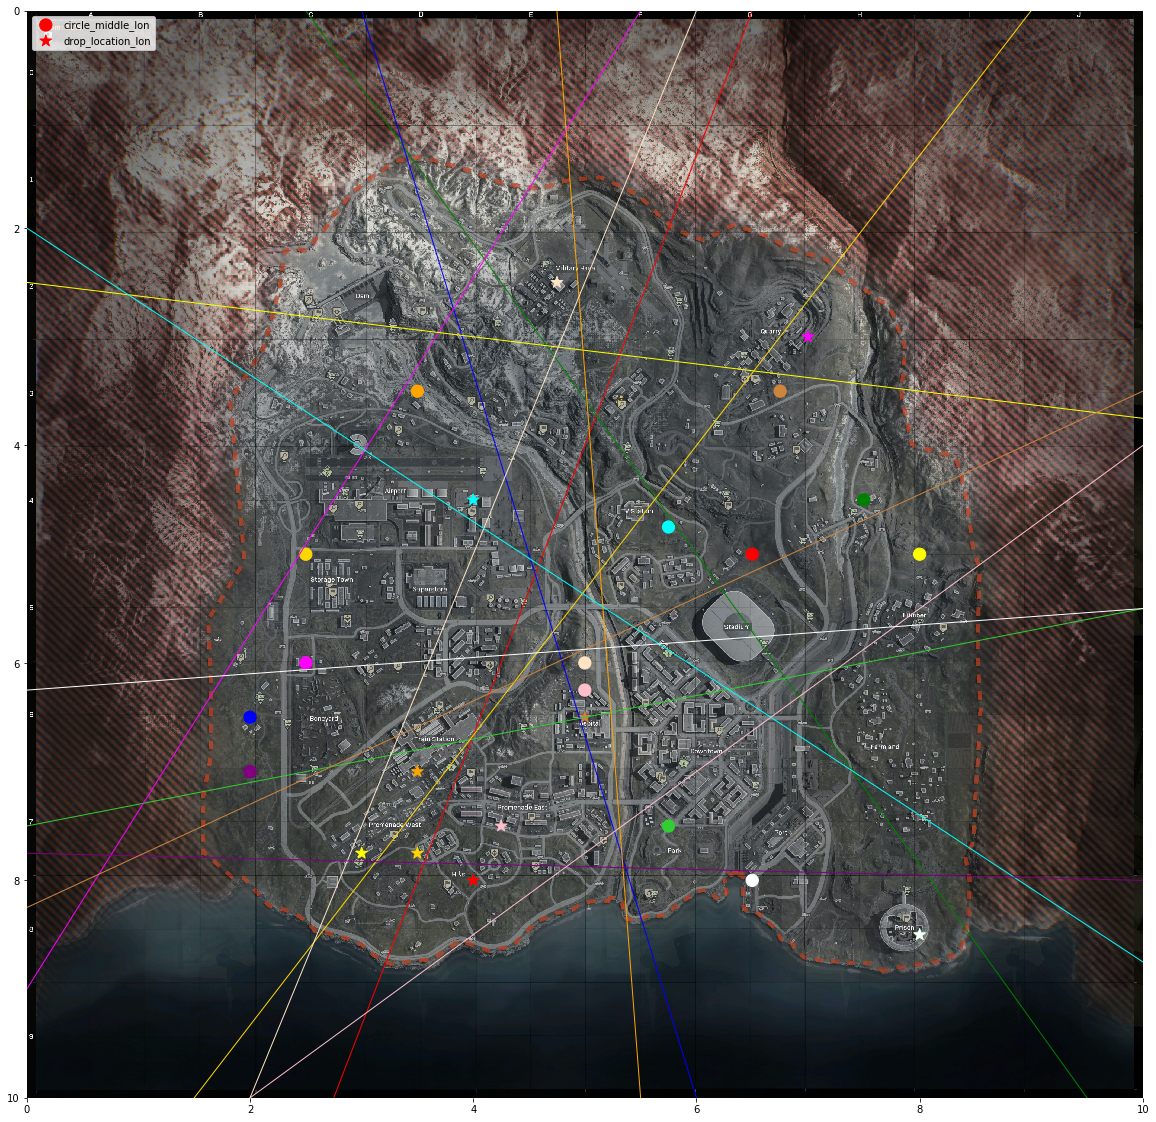

In [4]:
print('Each Color represents a different game')
im = plt.imread('Verdansk.png')
colors = ["red", "green", "blue", "limegreen", "magenta", "yellow", "orange", "gold", "bisque", "cyan", "purple", "pink", "peru", "white"]

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(im, origin='upper', aspect='auto', extent=(0,10,10,0))
# ax.scatter(x='plane_start_lat', y='plane_start_lon', data=warzone, color=colors)
# ax.scatter(x='plane_end_lat', y='plane_end_lon', data=warzone, color=colors)
ax.scatter(x='circle_middle_lat', y='circle_middle_lon', data=warzone, color=colors, s=150)
ax.scatter(x='drop_location_lat', y='drop_location_lon', data=warzone, color=colors, marker='*', s=150)

ax.legend()
for index, row in warzone.iterrows():
    plt.plot(row[["plane_start_lat", "plane_end_lat"]],row[["plane_start_lon", "plane_end_lon"]], color=colors[index], lw=1)    
sns.despine(bottom=True, left=True)
    

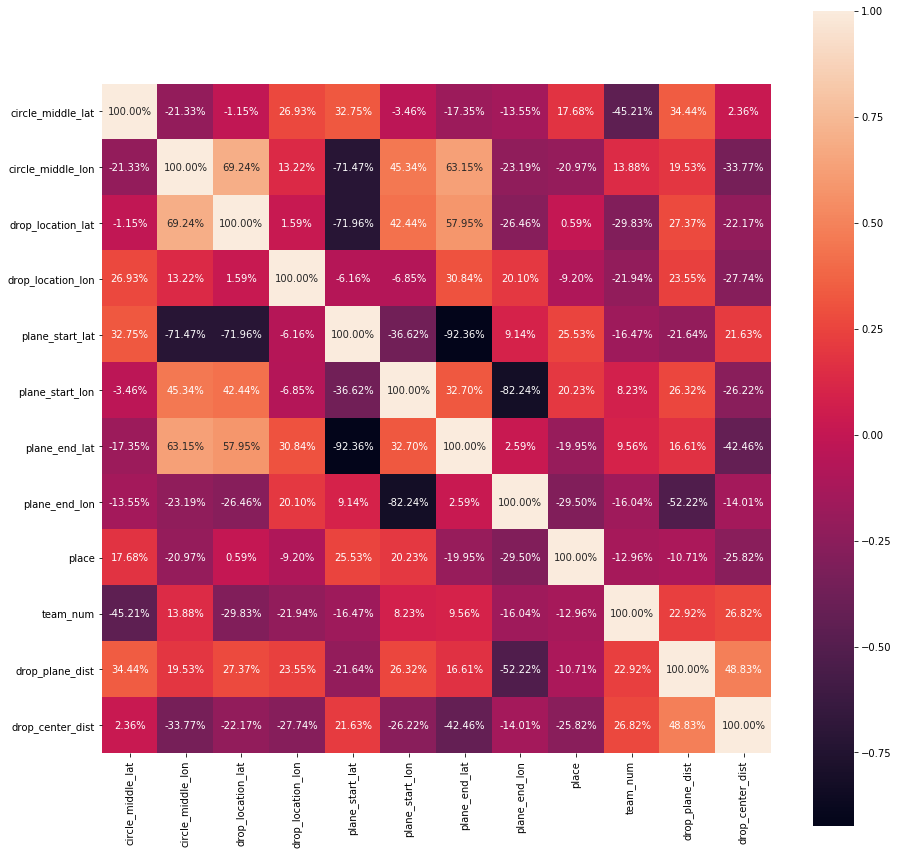

In [5]:
fig,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(warzone.corr(), fmt = '.2%', square=1, annot=True)

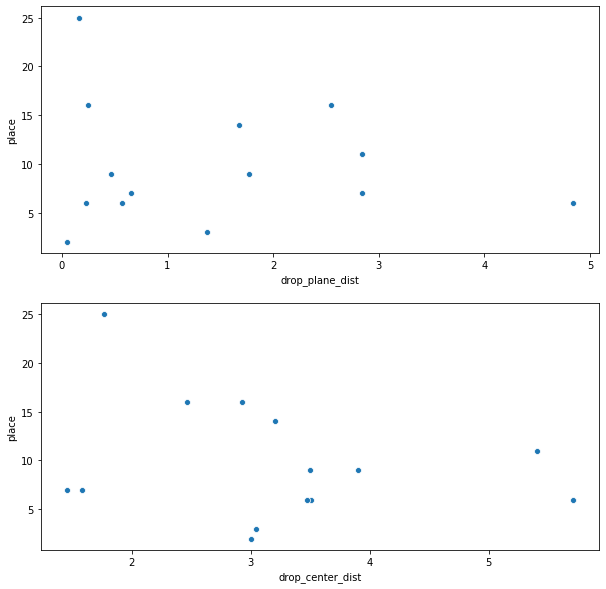

In [6]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
sns.scatterplot(data=warzone, x='drop_plane_dist', y='place',ax=ax[0])
sns.scatterplot(data=warzone, x='drop_center_dist', y='place',ax=ax[1])

In [7]:
import plotly.express as px
import plotly.graph_objects as go
# import plotly.offline as pyo

# pyo.init_notebook_mode()



# Add trace
# px.scatter(warzone, x='circle_middle_lat', y='circle_middle_lon')
# px.scatter(warzone, x='drop_location_lat', y='drop_location_lon')
# for index, row in warzone.iterrows():
#     px.parallel_coordinates(row[["plane_start_lat", "plane_end_lat"]],row[["plane_start_lon", "plane_end_lon"]])  

fig = go.Figure()

for index, row in warzone.iterrows():
    fig.add_trace(go.Scatter(x=row[['plane_start_lat', 'plane_end_lat']], y=row[['plane_start_lon', 'plane_end_lon']]))
    fig.add_trace(go.Scatter(x=[row['drop_location_lat']], y=[row['drop_location_lon']], mode='markers', marker={'symbol':"triangle-up"}))
    fig.add_trace(go.Scatter(x=[row['circle_middle_lat']], y=[row['circle_middle_lon']], mode='markers'))

fig.update_layout(width=1000, height=1000)
fig.update_yaxes(autorange="reversed")
fig.add_layout_image(
        dict(
            source="Verdansk.png",
            xref="x",
            yref="y",
            x=0,
            y=0,
            sizex=10,
            sizey=10,
            sizing="stretch",
            opacity=1,
            layer="below")
)

fig.show()



In [16]:
fig = go.FigureWidget()
fig.add_scatter(y=warzone['place']);
scatter = fig.data[0]

fig2 = go.Figure()
fig2.update_layout(width=1000, height=1000)
fig2.update_yaxes(autorange="reversed")
fig2.add_layout_image(
    go.layout.Image(
        source="Verdansk.png",
        xref="x",
        yref="y",
        x=0,
        y=0,
        sizex=10,
        sizey=10,
        sizing="stretch",
        opacity=1,
        layer="below")
)

fig2['layout']['xaxis1'].update(range=[0, 10], dtick=1, autorange=False)
fig2['layout']['yaxis1'].update(range=[10, 0], dtick=1, autorange=False)

def update_point(trace, points, selector):
    print('lakjsdfasdflk')
    game = warzone.iloc[points.point_inds[0], :]
    fig2.data = []
    fig2.add_trace(go.Scatter(x=game[['plane_start_lat', 'plane_end_lat']], y=game[['plane_start_lon', 'plane_end_lon']]))
    fig2.add_trace(go.Scatter(x=[game['drop_location_lat']], y=[game['drop_location_lon']], mode='markers', marker={'symbol':"triangle-up"}))
    fig2.add_trace(go.Scatter(x=[game['circle_middle_lat']], y=[game['circle_middle_lon']], mode='markers'))
    fig2.show()


scatter.on_click(update_point)

fig.show()